In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('pokemon.csv')
print (df.shape)
df.head(5)

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 1 Scatter plots for Numerical vs Numerical Variables 

### Matplotlib scatter

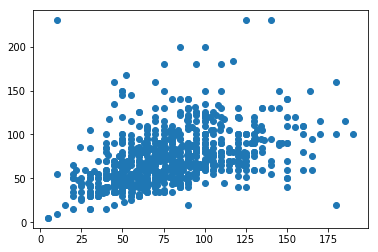

In [4]:
plt.scatter(x = df['Attack'], y= df['Defense'])

### Seaborn Regplot

C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


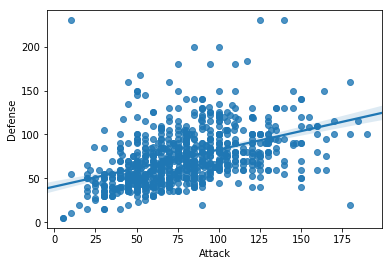

In [5]:
sns.regplot(data = df, x = 'Attack', y='Defense')

### Overplotting:
- Sampling
- Transparency
- Jitter

C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


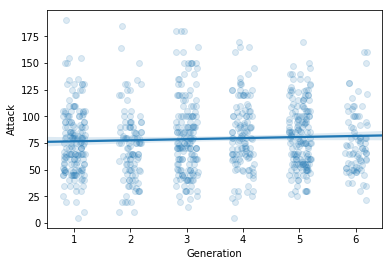

In [10]:
sns.regplot(data = df, y = 'Attack', x='Generation', x_jitter=0.2, scatter_kws= {'alpha': 0.15})

### Heatmap

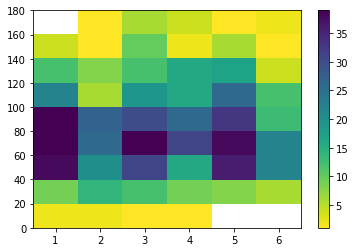

In [18]:
x_bins = np.arange(0.5, 7.5, 1)
y_bins = np.arange(0, df['Attack'].max()+1, 20)
plt.hist2d(data = df, x='Generation', y='Attack', bins = [x_bins, y_bins], cmap = 'viridis_r', cmin=1);

plt.colorbar()

## 2 Violin plots for Numerical vs Categorical Variables  

C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


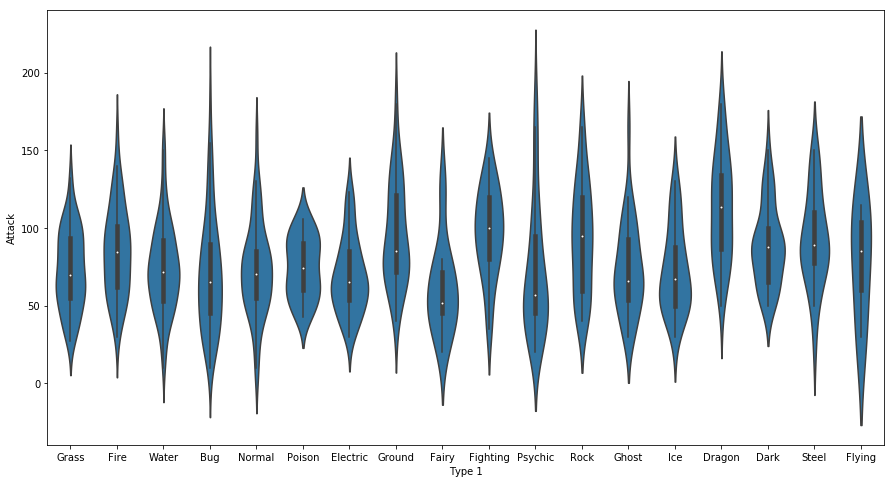

In [23]:
plt.figure(figsize = (15,8))
base_color = sns.color_palette()[0]
sns.violinplot(data = df, x='Type 1', y='Attack', color=base_color)

## 3 Box plot for Numerical vs Categorical Variable

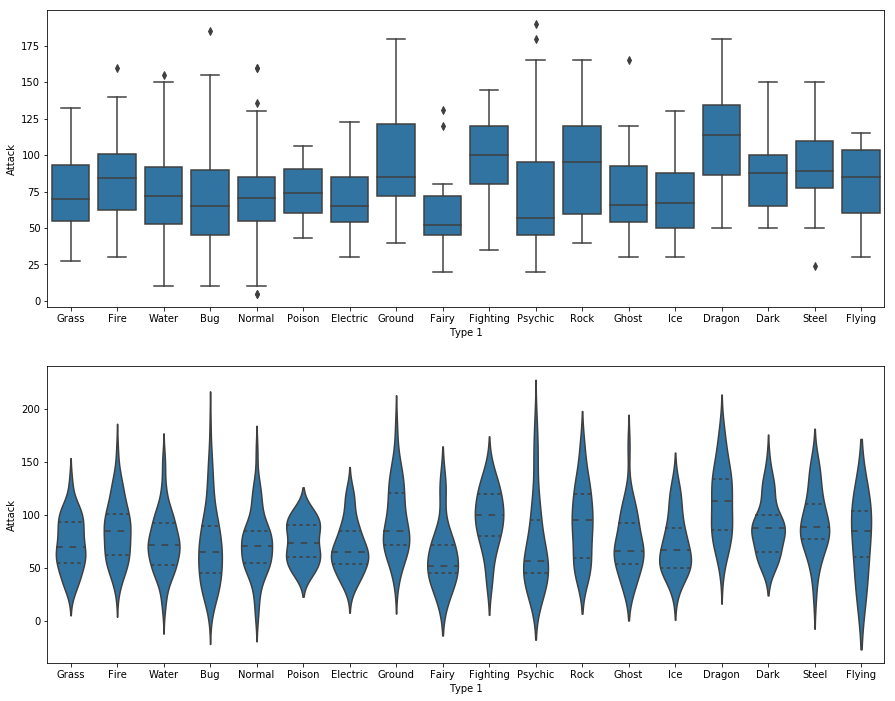

In [28]:
fig = plt.figure(figsize = (15,12))
base_color = sns.color_palette()[0]

fig.add_subplot(2,1,1)
sns.boxplot(data = df, x = 'Type 1', y='Attack', color = base_color)

fig.add_subplot(2,1,2)
sns.violinplot(data = df, x='Type 1', y='Attack', color=base_color, inner = 'quartile')

## 3 Clustered Bar charts for Categorical vs Categorical Variables

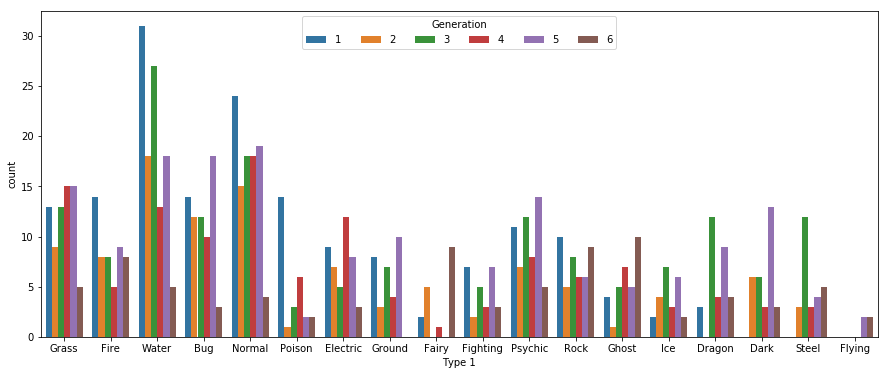

In [49]:
plt.figure(figsize = (15, 6))
sns.countplot(data = df, x = 'Type 1', hue = 'Generation')
plt.legend(loc = 9, ncol = 6, title = 'Generation', framealpha = 0.8)

## 4 Faceting 

Multiple copies of the same type of plot visualized on different subsets of the data

In [51]:
df = pd.read_csv('fuel_econ.csv')
print (df.shape)
df.head(3)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


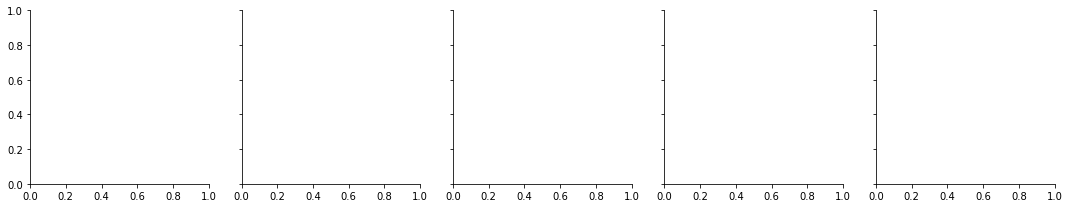

In [58]:
g = sns.FacetGrid(data= df, col = 'VClass')

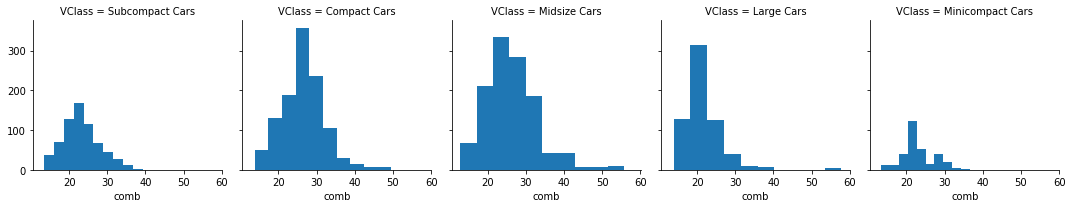

In [55]:
g = sns.FacetGrid(data= df, col = 'VClass')
g.map(plt.hist, 'comb')

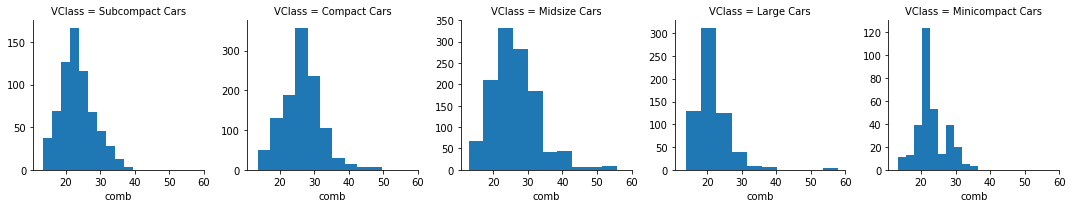

In [56]:
g = sns.FacetGrid(data= df, col = 'VClass', sharey= False)
g.map(plt.hist, 'comb')

#### Setting the Vclass variables as ordered categories variable and then plotting

In [57]:
vclass_order = ['Minicompact Cars' , 'Subcompact Cars', 'Compact Cars', 'Midsize Cars' ,'Large Cars']
ordered_cat = pd.api.types.CategoricalDtype(categories = vclass_order, ordered=True)
df['VClass'] = df['VClass'].astype(ordered_cat)

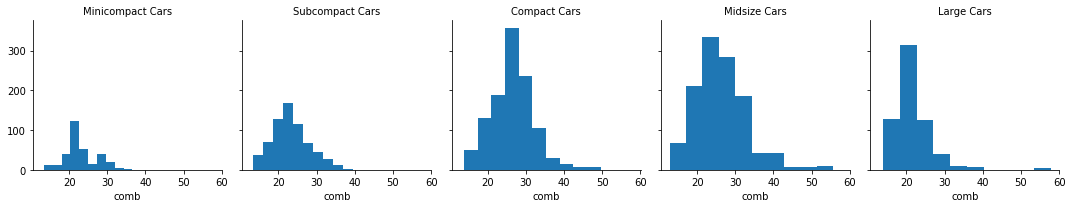

In [60]:
g = sns.FacetGrid(data= df, col = 'VClass')
g.map(plt.hist, 'comb')
g.set_titles('{col_name}')

## 5 Adapted Bar Charts

C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

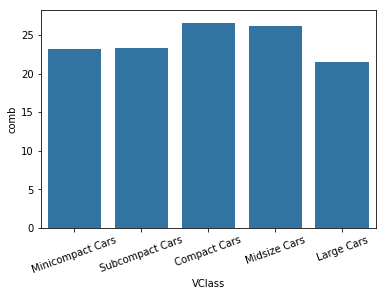

In [63]:
base_color = sns.color_palette()[0]
sns.barplot(data = df, x = 'VClass', y='comb', color= base_color, errwidth=0);
plt.xticks(rotation = 20)

C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


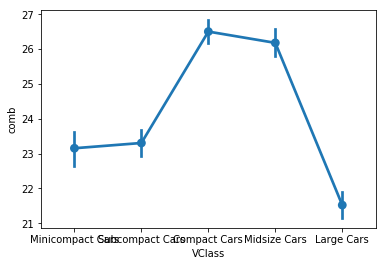

In [64]:
sns.pointplot(data = df, x='VClass', y='comb')

## 6 Line Plots

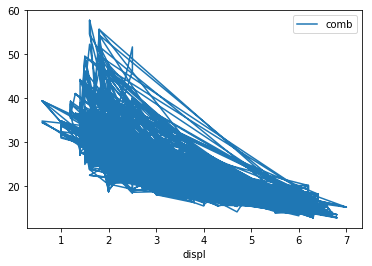

In [66]:
df.plot(x = 'displ', y='comb')

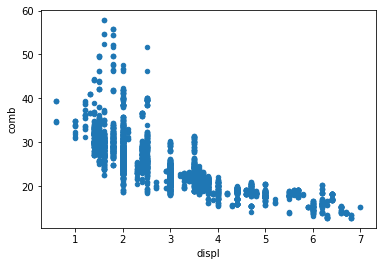

In [69]:
df.plot(x = 'displ', y='comb', kind='scatter')

C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


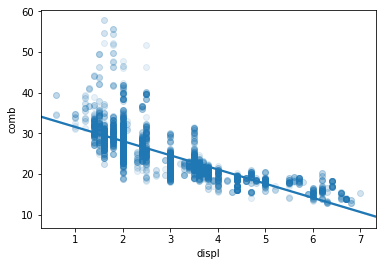

In [75]:
sns.regplot(data = df, x = 'displ', y='comb', scatter_kws = {'alpha':0.1});

C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


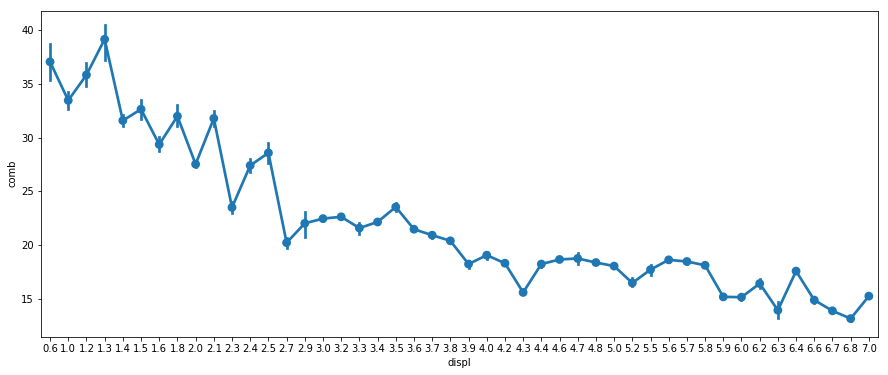

In [78]:
plt.figure(figsize = (15, 6))
sns.pointplot(data = df, x = 'displ', y='comb')

In [80]:
df['displ'].describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

<ErrorbarContainer object of 3 artists>

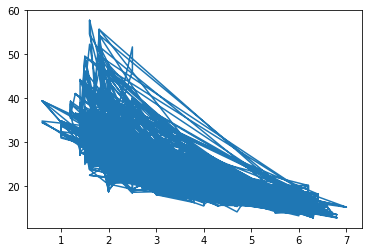

In [79]:
plt.errorbar(x= df['displ'], y=df['comb'])

In [84]:
x_bins = np.arange(0, 8, 1)
df['displ_bins']= pd.cut(df['displ'], bins = x_bins, right = False)
df.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,displ_bins
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,"[3, 4)"
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,"[2, 3)"
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,"[3, 4)"


C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


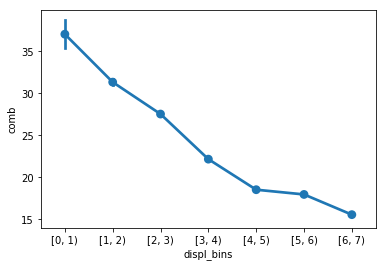

In [85]:
sns.pointplot(data = df, x = 'displ_bins', y='comb');

In [ ]:
plt.errorbar(x= df['displ_bins'], y=df['comb'])

## 7 Q-Q Plots